# IF3270 Pembelajaran Mesin | Tugas Besar - Feedforward Neural Network

Group Members:
- Maximilian Sulistiyo (13522061)
- Marvel Pangondian (13522075)
- Abdullah Mubarak (13522101)

In this project, we implement a custom built Feedforward Neural Network with no high-level libraries. The goal in this project is to be able to create a custom FFNN that is able to specify the type of activation function on each layer, the type of loss function, and how many neurons in each layer. We will also compare our algorithm with other built in algorithm (the sklearn MLP)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from ann import NeuralNetwork, one_hot, get_accuracy
from dense_layer import DenseLayer
from activations import *
from visualizer import visualize_ann
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from activations import tanh, sigmoid, relu

## Import Dataset

### Fetch dataset

In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

### Copy dataset and normalize

In [5]:
X_original = X.copy()
X_original = X_original/255.0
y_original = y.copy()
y_original = y_original.astype(int)

### Split dataset

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, train_size=60000, test_size=10000, stratify=y)

In [8]:
y_train_oh = one_hot(y_train)
y_test_oh = one_hot(y_test)

## Example of Training Model

In [11]:
model = NeuralNetwork('mse')
model.add_layer(DenseLayer(output_size=128, activation=relu, init="Xavier"))
model.add_layer(DenseLayer(output_size=64, activation=relu, init="Xavier"))
model.add_layer(DenseLayer(output_size=10, activation=sigmoid, init="Xavier"))

history = model.train(
    X_train,
    y_train,
    epochs=10,
    batch_size=64,
    learning_rate=0.05,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/10 - 2.58s - loss: 0.1007 - accuracy: 0.4027 - val_loss: 0.0839 - val_accuracy: 0.4011
[=================================================>] 100%
Epoch 2/10 - 2.51s - loss: 0.0750 - accuracy: 0.6186 - val_loss: 0.0651 - val_accuracy: 0.6165
[=================================================>] 100%
Epoch 3/10 - 2.75s - loss: 0.0559 - accuracy: 0.7747 - val_loss: 0.0482 - val_accuracy: 0.7750
[=================================================>] 100%
Epoch 4/10 - 2.73s - loss: 0.0422 - accuracy: 0.8407 - val_loss: 0.0375 - val_accuracy: 0.8406
[=================================================>] 100%
Epoch 5/10 - 2.64s - loss: 0.0339 - accuracy: 0.8597 - val_loss: 0.0311 - val_accuracy: 0.8606
[=================================================>] 100%
Epoch 6/10 - 2.68s - loss: 0.0288 - accuracy: 0.8740 - val_loss: 0.0271 - val_accuracy: 0.8728
[=================================================>] 100%
Epoch 7/10 - 2.83s - los

In [12]:
predictions = model.predict(X_test)
pred_classes = np.argmax(predictions, axis=1)
accuracy = accuracy_score(pred_classes, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8964


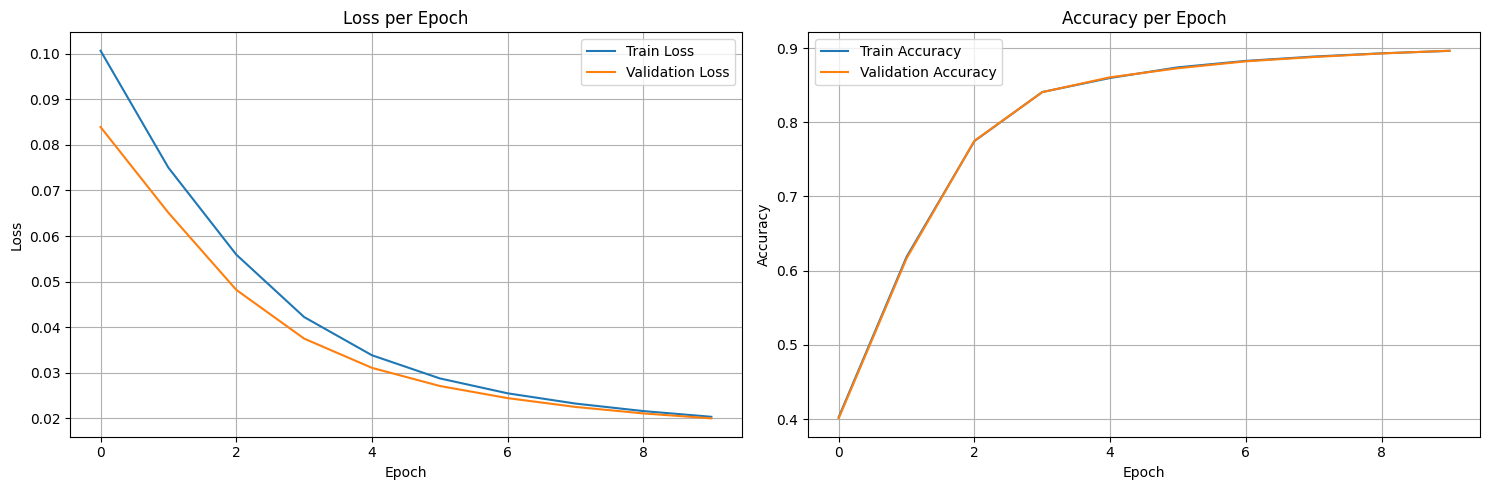

In [21]:
model.plot_training()

In [13]:
visualize_ann(model,X.shape[1],output_dir='../ann_visualizer/output/')

'../ann_visualizer/output/20250327_232302_ann.html'

## Analysis

### Effect of depth (Number of layers) and Width (Number of neurons per layer)

#### Fixed Depth
- Number of hidden layers : 2
- Test 1 : 32 neurons per layer
- Test 2 : 64 neurons per layer
- Test 3 : 128 neurons per layer

##### Test 1 - 32 neurons per layer

In [9]:
model_test_1_fixed_depth = NeuralNetwork('categorical_cross_entropy')
model_test_1_fixed_depth.add_layer(DenseLayer(output_size=32, activation=relu, init="Xavier"))
model_test_1_fixed_depth.add_layer(DenseLayer(output_size=32, activation=relu, init="Xavier"))
model_test_1_fixed_depth.add_layer(DenseLayer(output_size=10, activation=softmax, init="Xavier"))

history_test_1_fixed_depth = model_test_1_fixed_depth.train(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    learning_rate=0.05,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/50 - 1.87s - loss: 0.5491 - accuracy: 0.9090 - val_loss: 0.3063 - val_accuracy: 0.9086
[=================================================>] 100%
Epoch 2/50 - 1.81s - loss: 0.2556 - accuracy: 0.9402 - val_loss: 0.2144 - val_accuracy: 0.9390
[=================================================>] 100%
Epoch 3/50 - 1.83s - loss: 0.2032 - accuracy: 0.9483 - val_loss: 0.1872 - val_accuracy: 0.9468
[=================================================>] 100%
Epoch 4/50 - 1.88s - loss: 0.1706 - accuracy: 0.9443 - val_loss: 0.2025 - val_accuracy: 0.9395
[=================================================>] 100%
Epoch 5/50 - 1.83s - loss: 0.1509 - accuracy: 0.9572 - val_loss: 0.1600 - val_accuracy: 0.9535
[=================================================>] 100%
Epoch 6/50 - 1.81s - loss: 0.1355 - accuracy: 0.9633 - val_loss: 0.1413 - val_accuracy: 0.9580
[=================================================>] 100%
Epoch 7/50 - 1.82s - los

In [15]:
predictions_test_1_fixed_depth = model_test_1_fixed_depth.predict(X_test)
pred_classes_test_1_fixed_depth = np.argmax(predictions_test_1_fixed_depth, axis=1)
accuracy_test_1_fixed_depth = accuracy_score(pred_classes_test_1_fixed_depth, y_test)
print("Test Accuracy:", accuracy_test_1_fixed_depth)

Test Accuracy: 0.97


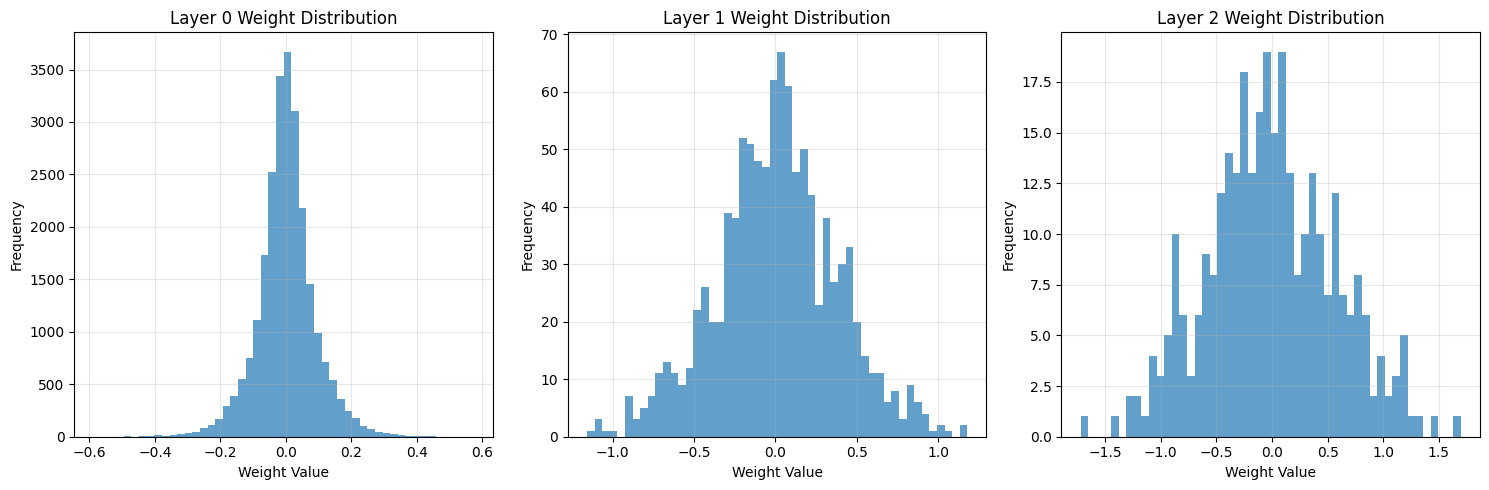

In [17]:
model_test_1_fixed_depth.plot_weight_distribution()

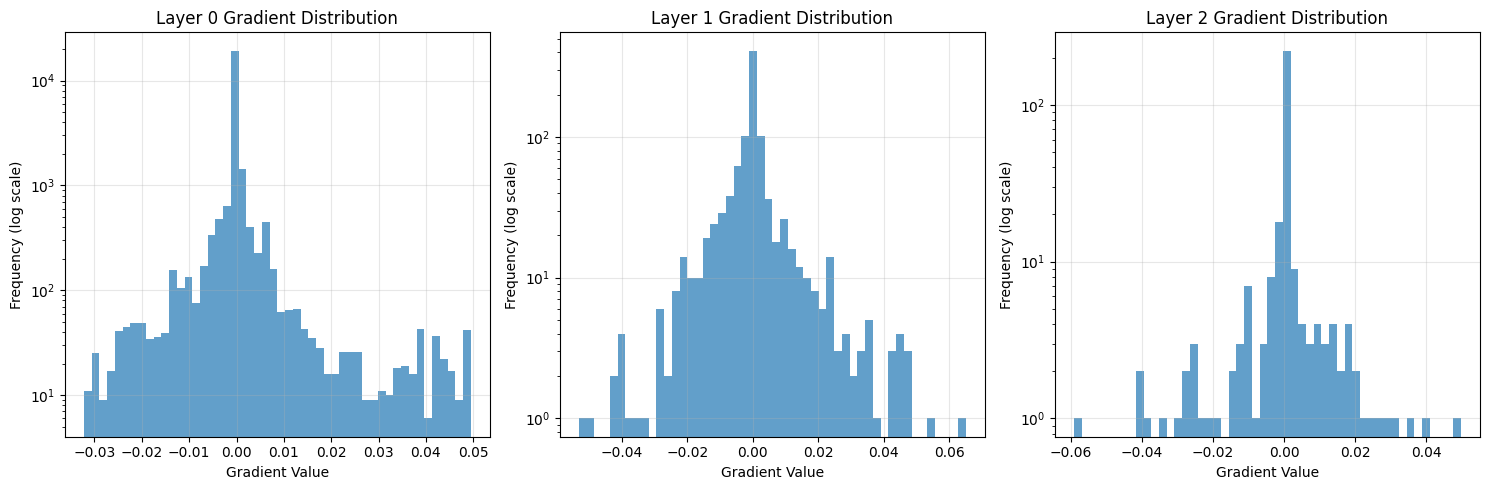

In [19]:
model_test_1_fixed_depth.plot_gradient_distribution()

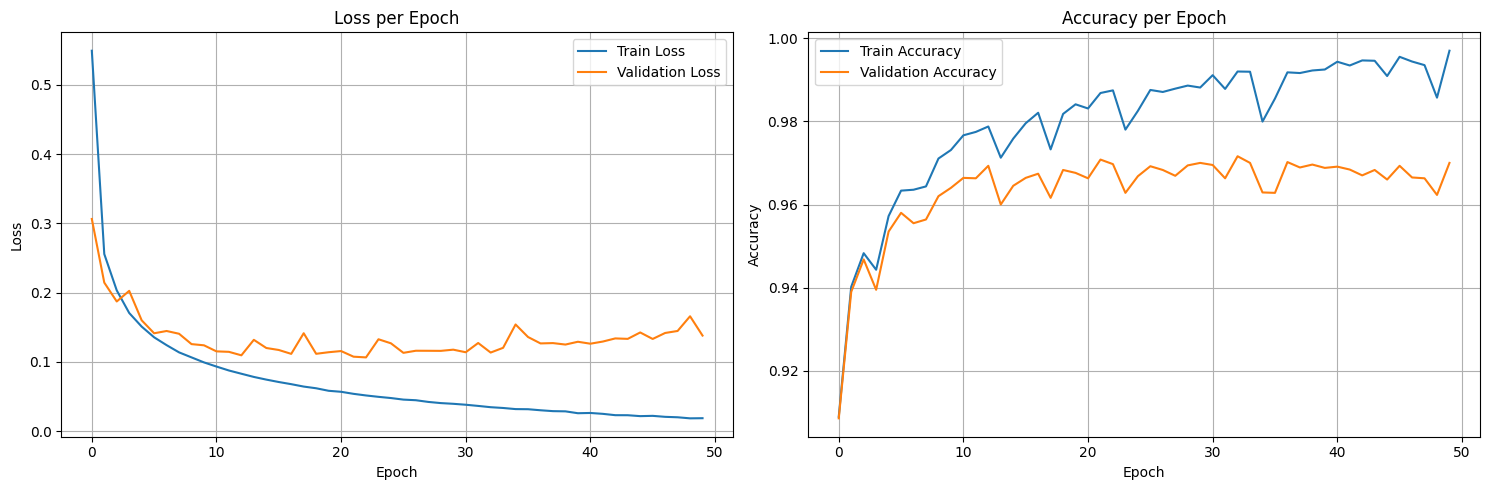

In [20]:
model_test_1_fixed_depth.plot_training()

##### Test 2 - 64 neurons per layer

In [22]:
model_test_2_fixed_depth = NeuralNetwork('categorical_cross_entropy')
model_test_2_fixed_depth.add_layer(DenseLayer(output_size=64, activation=relu, init="Xavier"))
model_test_2_fixed_depth.add_layer(DenseLayer(output_size=64, activation=relu, init="Xavier"))
model_test_2_fixed_depth.add_layer(DenseLayer(output_size=10, activation=softmax, init="Xavier"))

history_test_2_fixed_depth = model_test_2_fixed_depth.train(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    learning_rate=0.05,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/50 - 2.38s - loss: 0.5048 - accuracy: 0.9203 - val_loss: 0.2755 - val_accuracy: 0.9187
[=================================================>] 100%
Epoch 2/50 - 2.26s - loss: 0.2412 - accuracy: 0.9383 - val_loss: 0.2132 - val_accuracy: 0.9363
[=================================================>] 100%
Epoch 3/50 - 2.37s - loss: 0.1860 - accuracy: 0.9514 - val_loss: 0.1724 - val_accuracy: 0.9469
[=================================================>] 100%
Epoch 4/50 - 2.37s - loss: 0.1520 - accuracy: 0.9621 - val_loss: 0.1459 - val_accuracy: 0.9563
[=================================================>] 100%
Epoch 5/50 - 2.19s - loss: 0.1288 - accuracy: 0.9668 - val_loss: 0.1308 - val_accuracy: 0.9617
[=================================================>] 100%
Epoch 6/50 - 2.34s - loss: 0.1126 - accuracy: 0.9702 - val_loss: 0.1229 - val_accuracy: 0.9644
[=================================================>] 100%
Epoch 7/50 - 2.76s - los

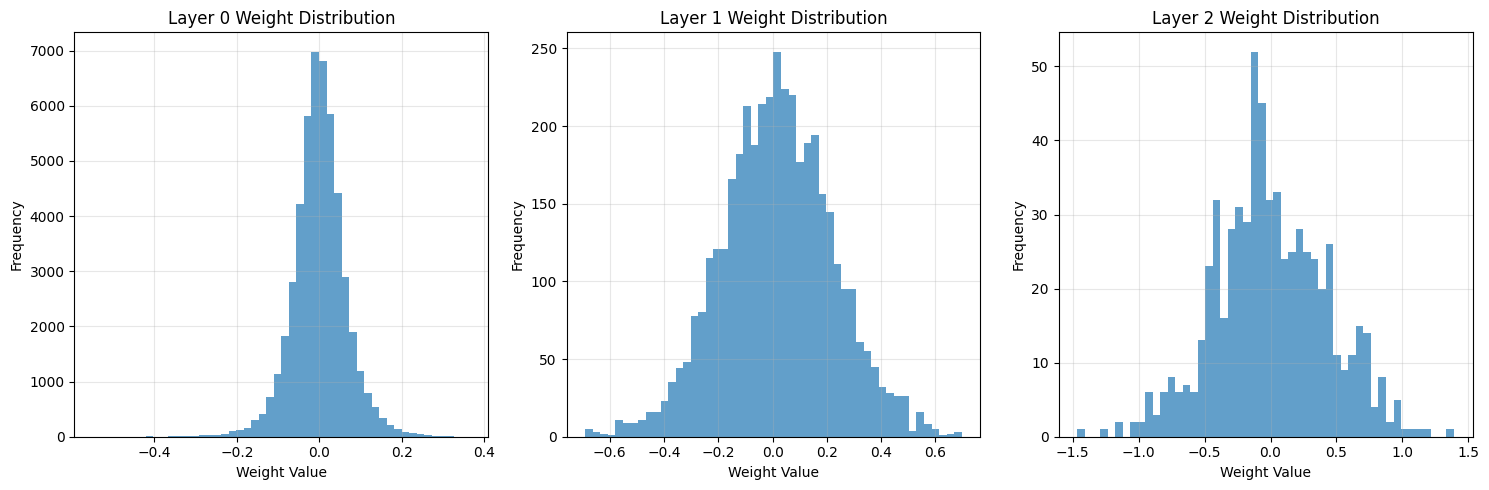

In [23]:
model_test_2_fixed_depth.plot_weight_distribution()

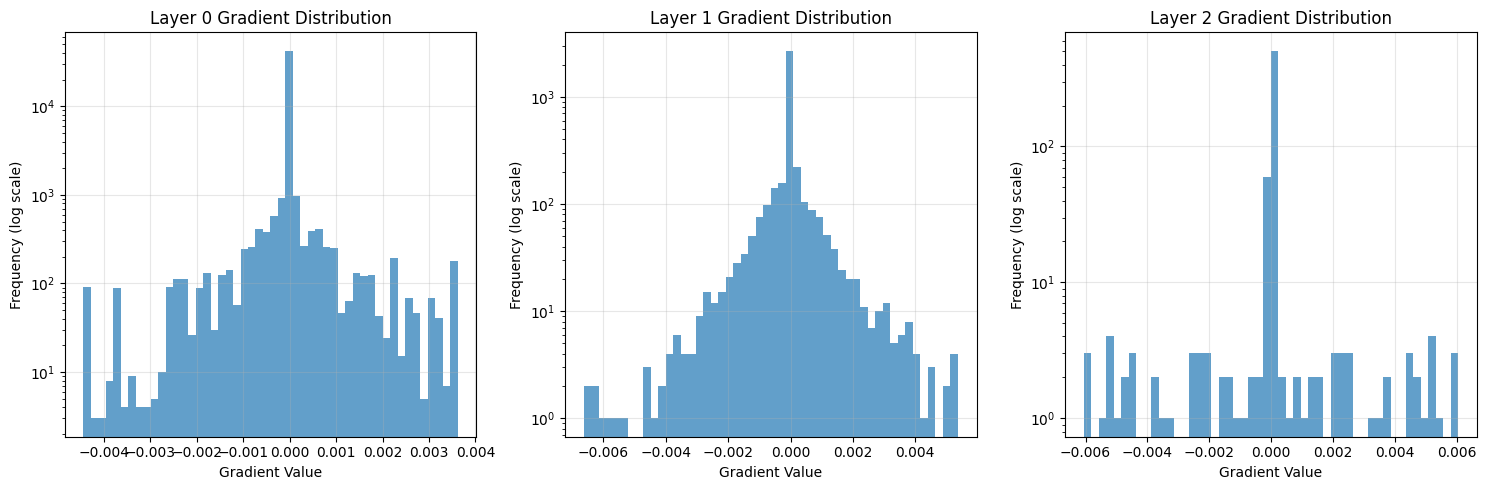

In [24]:
model_test_2_fixed_depth.plot_gradient_distribution()

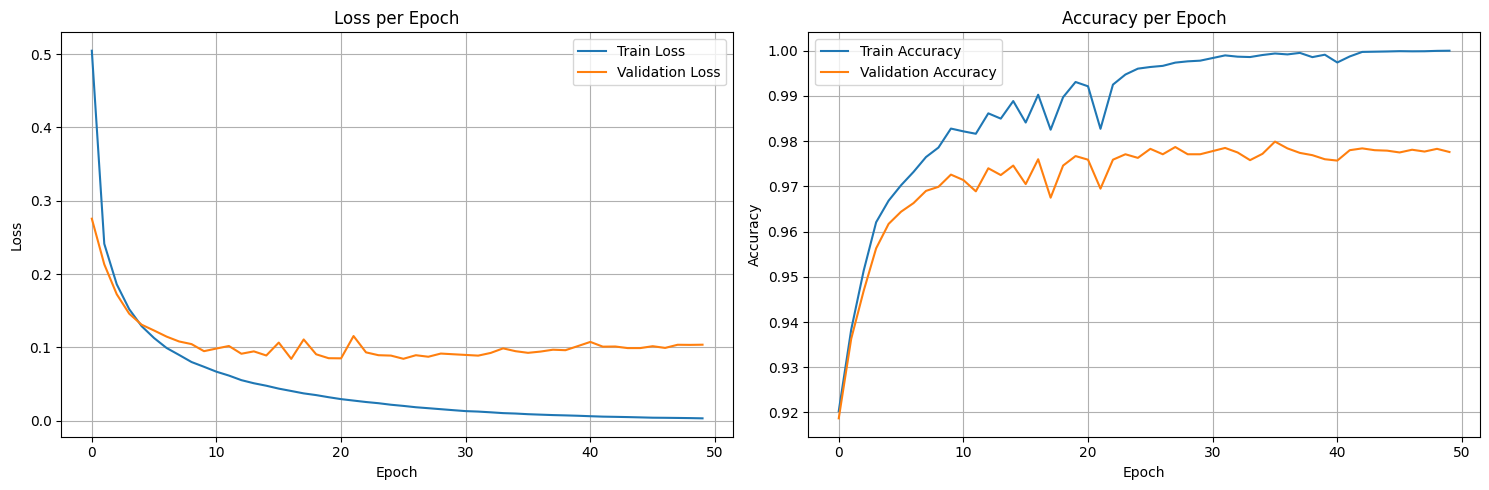

In [25]:
model_test_2_fixed_depth.plot_training()

## Compare model with sklearn MLP

In [16]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64),activation='relu', 
                    solver='adam', max_iter=20, random_state=1, verbose=True)

mlp.fit(X_train, y_train)

Iteration 1, loss = 0.37724840
Iteration 2, loss = 0.15004672
Iteration 3, loss = 0.10562821
Iteration 4, loss = 0.08064147
Iteration 5, loss = 0.06428497
Iteration 6, loss = 0.05121985
Iteration 7, loss = 0.04219482
Iteration 8, loss = 0.03723277
Iteration 9, loss = 0.02986735
Iteration 10, loss = 0.02325205
Iteration 11, loss = 0.02124234
Iteration 12, loss = 0.01549812
Iteration 13, loss = 0.01433403
Iteration 14, loss = 0.01377085
Iteration 15, loss = 0.00927998
Iteration 16, loss = 0.00973711
Iteration 17, loss = 0.01097088
Iteration 18, loss = 0.00895768
Iteration 19, loss = 0.00620646
Iteration 20, loss = 0.00376964


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=20, random_state=1,
              verbose=True)

In [17]:
y_pred_mlp = mlp.predict(X_test)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLPClassifier Test Accuracy: {acc_mlp:.4f}")

MLPClassifier Test Accuracy: 0.9790


In [18]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       986
           1       0.99      0.99      0.99      1125
           2       0.97      0.98      0.98       999
           3       0.99      0.95      0.97      1020
           4       0.98      0.98      0.98       975
           5       0.96      0.98      0.97       902
           6       0.99      0.99      0.99       982
           7       0.98      0.98      0.98      1042
           8       0.98      0.97      0.97       975
           9       0.95      0.99      0.97       994

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

